In [1]:
#import libraries
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader

c:\Users\hp\anaconda3\envs\dpenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [25]:
#device configuration:GPU support
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split

#loading train dataset
train_data=pd.read_csv(r"E:\Projects\Victor-Files\Digit_recognizer\data\train.csv")
X_train=train_data.iloc[:,1:].values/255.0 #Normalize pixel values
y_train=train_data.iloc[:,0].values
#loading test dataset
X_test=pd.read_csv(r"E:\Projects\Victor-Files\Digit_recognizer\data\test.csv").values / 255.0 

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Convert to torch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)  # Features as float32
y_train = torch.tensor(y_train, dtype=torch.long)     # Labels as int64 (torch.long)
X_val = torch.tensor(X_val, dtype=torch.float32)      # Features as float32
y_val = torch.tensor(y_val, dtype=torch.long)         # Labels as int64 (torch.long)
X_test = torch.tensor(X_test, dtype=torch.float32)    # Features as float32


In [31]:
#datasets
class MNISTDataset(Dataset):
    def __init__(self, X, y=None):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        if self.y is not None:
            return self.X[idx], self.y[idx]
        else:
            return self.X[idx]

In [32]:
# Create datasets
train_dataset = MNISTDataset(X_train, y_train)
val_dataset = MNISTDataset(X_val, y_val)
test_dataset = MNISTDataset(X_test)

# Create dataloaders
train_loader = DataLoader(train_dataset, batch_size=100, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=100, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=100, shuffle=False)

In [33]:
# We can create an itterater using the dataloaders and take a random sample 
import random 
# Create an iterator from the DataLoader
data_iter = iter(train_loader)

# Get one batch of data
images, labels = next(data_iter)

# Select a random index from the batch
random_index = random.randint(0, len(labels) - 1)

# Get the random sample
sample_image = images[random_index]
sample_label = labels[random_index]

print(f'Sample Label: {sample_label}')
print(f'Sample Image Shape: {sample_image.shape}')

Sample Label: 1
Sample Image Shape: torch.Size([784])


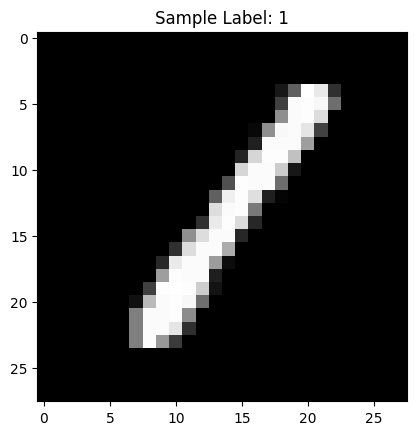

In [34]:
#Visualize the sample
import matplotlib.pyplot as plt

# Reshape the sample image to 28x28 for visualization
sample_image = sample_image.reshape(28, 28).numpy()

# Plot the sample image
plt.imshow(sample_image, cmap='gray')
plt.title(f'Sample Label: {sample_label.item()}')
plt.show()


In [17]:
#hyperparameters
input_size=784
hidden_size=100
num_classes=10
learning_rate=0.001

In [35]:
#Neural Network Model
class FeedForwardNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(FeedForwardNN, self).__init__()
        self.l1=nn.Linear(input_size, hidden_size)
        self.relu=nn.ReLU()
        self.l2=nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        out=self.l1(x)
        out=self.relu(out)
        out=self.l2(out)
        return out

#Instatnitiate the model
model=FeedForwardNN(input_size,hidden_size,num_classes)



In [36]:
#loss and optimizer
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(), lr=learning_rate)

In [37]:
def train(model, train_loader, val_loader, criterion, optimizer, epochs):
    for epoch in range(1, epochs + 1):
        model.train()
        running_loss = 0.0
        for batch_idx, (data, target) in enumerate(train_loader):
            # Flatten the data
            data = data.view(data.size(0), -1)
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            if batch_idx % 100 == 99:  # Print every 100 batches
                print(f'Epoch {epoch}, Batch {batch_idx+1}, Loss: {running_loss / 100:.6f}')
                running_loss = 0.0
        
        

In [38]:
#Validate the model
def validate(model, val_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data, target in val_loader:
            # Flatten the data
            data = data.view(data.size(0), -1)
            outputs = model(data)
            _, predicted = torch.max(outputs.data, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()
    accuracy = 100 * correct / total
    print(f'Validation Accuracy: {accuracy}%')

In [39]:
# Train the model for 10 epochs
train(model, train_loader, val_loader, criterion, optimizer, epochs=10)

Epoch 1, Batch 100, Loss: 0.931709
Epoch 1, Batch 200, Loss: 0.389430
Epoch 1, Batch 300, Loss: 0.307554
Validation Accuracy: 91.21428571428571%
Epoch 2, Batch 100, Loss: 0.271686
Epoch 2, Batch 200, Loss: 0.236710
Epoch 2, Batch 300, Loss: 0.222327
Validation Accuracy: 93.36904761904762%
Epoch 3, Batch 100, Loss: 0.194905
Epoch 3, Batch 200, Loss: 0.190835
Epoch 3, Batch 300, Loss: 0.178091
Validation Accuracy: 94.85714285714286%
Epoch 4, Batch 100, Loss: 0.145367
Epoch 4, Batch 200, Loss: 0.154332
Epoch 4, Batch 300, Loss: 0.152623
Validation Accuracy: 95.51190476190476%
Epoch 5, Batch 100, Loss: 0.127961
Epoch 5, Batch 200, Loss: 0.123951
Epoch 5, Batch 300, Loss: 0.120334
Validation Accuracy: 95.98809523809524%
Epoch 6, Batch 100, Loss: 0.109477
Epoch 6, Batch 200, Loss: 0.106077
Epoch 6, Batch 300, Loss: 0.104595
Validation Accuracy: 96.14285714285714%
Epoch 7, Batch 100, Loss: 0.090691
Epoch 7, Batch 200, Loss: 0.091230
Epoch 7, Batch 300, Loss: 0.091049
Validation Accuracy: 96.3

In [51]:
#Making Predicitons 
import numpy as np
import matplotlib.pyplot as plt

def make_predictions(model, test_loader):
    model.eval()
    predictions = []
    logits_list = []  # List to store output logits

    with torch.no_grad():
        for data in test_loader:
            data = data.view(data.size(0), -1)
            outputs = model(data)
            logits_list.append(outputs.detach().cpu().numpy())  # Store output logits
            _, predicted = torch.max(outputs.data, 1)
            predictions.extend(predicted.cpu().numpy())

    return predictions, logits_list

# Make predictions
predictions, logits_list = make_predictions(model, test_loader)

# Print first 10 predictions
print(f"First 10 predictions: {predictions[:10]}")



First 10 predictions: [2, 0, 9, 9, 3, 7, 0, 3, 0, 3]


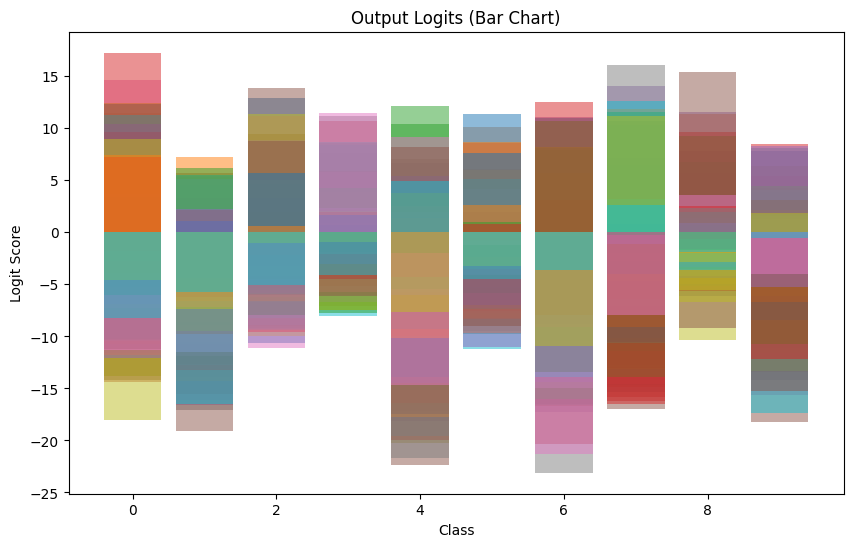

In [50]:
#Visualize output logits for the first batch
logits = logits_list[0]
num_classes = logits.shape[1]

# Bar chart
plt.figure(figsize=(10, 6))
for i in range(logits.shape[0]):
    plt.bar(np.arange(num_classes), logits[i], alpha=0.5)
plt.xlabel("Class")
plt.ylabel("Logit Score")
plt.title("Output Logits (Bar Chart)")
plt.show()